# Определение стоимости автомобилей

Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. В вашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. Вам нужно построить модель для определения стоимости. 

Заказчику важны:

- качество предсказания;
- скорость предсказания;
- время обучения.

# Подготовка данных

для начала строит взглянуть на данные и познакомиться с ними

## Загрузка датасета

In [1]:
pip install category_encoders


     |████████████████████████████████| 81 kB 848 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
import category_encoders as ce
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb
from sklearn.preprocessing import OneHotEncoder

In [3]:
df = pd.read_csv('/datasets/autos.csv')
df.head(7)

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
5,2016-04-04 17:36:23,650,sedan,1995,manual,102,3er,150000,10,petrol,bmw,yes,2016-04-04 00:00:00,0,33775,2016-04-06 19:17:07
6,2016-04-01 20:48:51,2200,convertible,2004,manual,109,2_reihe,150000,8,petrol,peugeot,no,2016-04-01 00:00:00,0,67112,2016-04-05 18:18:39


In [4]:
df.tail(7)

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
354362,2016-03-19 19:53:49,3200,sedan,2004,manual,225,leon,150000,5,petrol,seat,yes,2016-03-19 00:00:00,0,96465,2016-03-19 20:44:43
354363,2016-03-27 20:36:20,1150,bus,2000,manual,0,zafira,150000,3,petrol,opel,no,2016-03-27 00:00:00,0,26624,2016-03-29 10:17:23
354364,2016-03-21 09:50:58,0,NaN,2005,manual,0,colt,150000,7,petrol,mitsubishi,yes,2016-03-21 00:00:00,0,2694,2016-03-21 10:42:49
354365,2016-03-14 17:48:27,2200,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,0,39576,2016-04-06 00:46:52
354366,2016-03-05 19:56:21,1199,convertible,2000,auto,101,fortwo,125000,3,petrol,smart,no,2016-03-05 00:00:00,0,26135,2016-03-11 18:17:12
354367,2016-03-19 18:57:12,9200,bus,1996,manual,102,transporter,150000,3,gasoline,volkswagen,no,2016-03-19 00:00:00,0,87439,2016-04-07 07:15:26
354368,2016-03-20 19:41:08,3400,wagon,2002,manual,100,golf,150000,6,gasoline,volkswagen,NaN,2016-03-20 00:00:00,0,40764,2016-03-24 12:45:21


In [5]:
df.sample(10)

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
44282,2016-04-01 21:52:33,11000,wagon,2010,manual,140,NaN,70000,11,petrol,opel,NaN,2016-04-01 00:00:00,0,10315,2016-04-03 19:46:22
298798,2016-03-19 17:46:01,1500,wagon,2003,auto,101,astra,150000,5,gasoline,opel,no,2016-03-19 00:00:00,0,16348,2016-04-03 02:47:03
68902,2016-03-13 01:54:57,190,NaN,1995,manual,88,mondeo,150000,5,NaN,ford,NaN,2016-03-12 00:00:00,0,27412,2016-04-02 15:17:29
91452,2016-04-02 23:39:19,700,convertible,1995,manual,110,3_reihe,150000,5,petrol,peugeot,no,2016-04-02 00:00:00,0,6231,2016-04-04 23:15:34
69887,2016-03-19 15:50:02,1000,small,1999,manual,75,lupo,150000,4,petrol,volkswagen,no,2016-03-19 00:00:00,0,72516,2016-04-07 00:45:33
318155,2016-03-29 17:52:15,890,small,2000,manual,60,2_reihe,150000,12,petrol,peugeot,NaN,2016-03-29 00:00:00,0,30165,2016-03-31 11:16:17
297225,2016-03-27 12:51:35,1000,sedan,1999,manual,107,scenic,150000,10,petrol,renault,no,2016-03-27 00:00:00,0,28277,2016-04-03 07:53:05
3789,2016-03-31 15:52:04,12999,wagon,2007,auto,197,5er,150000,1,gasoline,bmw,no,2016-03-31 00:00:00,0,14109,2016-04-06 08:46:20
351518,2016-03-21 21:48:24,3999,sedan,1994,auto,326,s_klasse,150000,9,petrol,mercedes_benz,no,2016-03-21 00:00:00,0,26203,2016-04-07 09:15:22
39331,2016-03-17 19:38:23,1750,NaN,2017,NaN,64,caddy,150000,11,gasoline,volkswagen,NaN,2016-03-17 00:00:00,0,39638,2016-03-17 19:38:23


Теперь более детальное знакомство

Признаки:
- DateCrawled — дата скачивания анкеты из базы
- VehicleType — тип автомобильного кузова
- RegistrationYear — год регистрации автомобиля
- Gearbox — тип коробки передач
- Power — мощность (л. с.)
- Model — модель автомобиля
- Kilometer — пробег (км)
- RegistrationMonth — месяц регистрации автомобиля
- FuelType — тип топлива
- Brand — марка автомобиля
- Repaired — была машина в ремонте или нет
- DateCreated — дата создания анкеты
- NumberOfPictures — количество фотографий автомобиля
- PostalCode — почтовый индекс владельца анкеты (пользователя)
- LastSeen — дата последней активности пользователя
Целевой признак:
- Price — цена (евро)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  Repaired           283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

в этом датафрейме 354370 объектов и 16 столбцов, довольно большой датасет

**Вывод**

Общие представления о данных были получены, теперь нужно заняться улучшением самого датасета

## Обработка данных

### Название столбцов

Название столбцов изменю под змеиный стиль для урощения работы 


In [7]:
df = df.rename(columns={'DateCrawled':'date_crawled', 
                        'Price': 'price',
                        'VehicleType':'vehicle_type', 
                        'RegistrationYear':'registration_year', 
                         'Gearbox':'gearbox',
                        'Power': 'power',
                        'Model': 'model',
                        'Kilometr': 'kiloetr',
                        'RegistrationMonth':'registration_month', 
                        'FuelType':'fuel_type', 
                        'Brand' : 'brand',
                        'Repaired':'repaired',
                        'NotRepaired':'not_repaired', 
                        'DateCreated':'date_created',
                        'NumberOfPictures': 'number_of_pictures',
                        'PostalCode':'postal_code',
                        'LastSeen':'last_seen'})

In [8]:
df

,date_crawled,price,vehicle_type,registration_year,gearbox,power,model,Kilometer,registration_month,fuel_type,brand,repaired,date_created,number_of_pictures,postal_code,last_seen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354364,2016-03-21 09:50:58,0,NaN,2005,manual,0,colt,150000,7,petrol,mitsubishi,yes,2016-03-21 00:00:00,0,2694,2016-03-21 10:42:49
354365,2016-03-14 17:48:27,2200,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,0,39576,2016-04-06 00:46:52
354366,2016-03-05 19:56:21,1199,convertible,2000,auto,101,fortwo,125000,3,petrol,smart,no,2016-03-05 00:00:00,0,26135,2016-03-11 18:17:12
354367,2016-03-19 18:57:12,9200,bus,1996,manual,102,transporter,150000,3,gasoline,volkswagen,no,2016-03-19 00:00:00,0,87439,2016-04-07 07:15:26


### Типы данных признаков

Почти все признакми имеют правильный тип данных. Однако признак Repaired я бы заменил на int заменив его значения на 0 и 1, где 1 говорила бы о наличии ремонта. Так же, возможно для первичного анализа понадобятся строки содержащие дату, которые не нужны для обучения, если я захочу посомтреть на распределение дат, то заменю тип на date. К тому есть пара слов о признаке price, его лучше хранить в double для точности, но в данном случае изменения не приведет к этому, ведь тут мы не сможем изменить саму цену, таким способом мы только увеличим требуемую памыть для хранения, поэтому оставлю так как есть

In [9]:
df['repaired'] = df['repaired'].replace({'no': 0, 'yes': 1})
df['repaired'] = pd.to_numeric(df['repaired'], errors='coerce').astype('Int64')

In [10]:
df['date_crawled'] = pd.to_datetime(df['date_crawled'])

In [11]:
df['date_reated'] = pd.to_datetime(df['date_created'])
df['last_seen'] = pd.to_datetime(df['last_seen'])

In [12]:
df

,date_crawled,price,vehicle_type,registration_year,gearbox,power,model,Kilometer,registration_month,fuel_type,brand,repaired,date_created,number_of_pictures,postal_code,last_seen,date_reated
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,<NA>,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57,2016-03-24
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,1,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50,2016-03-24
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,<NA>,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46,2016-03-14
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,0,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17,2016-03-17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,0,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21,2016-03-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354364,2016-03-21 09:50:58,0,NaN,2005,manual,0,colt,150000,7,petrol,mitsubishi,1,2016-03-21 00:00:00,0,2694,2016-03-21 10:42:49,2016-03-21
354365,2016-03-14 17:48:27,2200,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,<NA>,2016-03-14 00:00:00,0,39576,2016-04-06 00:46:52,2016-03-14
354366,2016-03-05 19:56:21,1199,convertible,2000,auto,101,fortwo,125000,3,petrol,smart,0,2016-03-05 00:00:00,0,26135,2016-03-11 18:17:12,2016-03-05
354367,2016-03-19 18:57:12,9200,bus,1996,manual,102,transporter,150000,3,gasoline,volkswagen,0,2016-03-19 00:00:00,0,87439,2016-04-07 07:15:26,2016-03-19


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   date_crawled        354369 non-null  datetime64[ns]
 1   price               354369 non-null  int64         
 2   vehicle_type        316879 non-null  object        
 3   registration_year   354369 non-null  int64         
 4   gearbox             334536 non-null  object        
 5   power               354369 non-null  int64         
 6   model               334664 non-null  object        
 7   Kilometer           354369 non-null  int64         
 8   registration_month  354369 non-null  int64         
 9   fuel_type           321474 non-null  object        
 10  brand               354369 non-null  object        
 11  repaired            283215 non-null  Int64         
 12  date_created        354369 non-null  object        
 13  number_of_pictures  354369 no

### Пропуски

Для начала посмотрим как много пропусков в каждом признаке

In [14]:
df.isna().mean()*100

date_crawled           0.000000
price                  0.000000
vehicle_type          10.579368
registration_year      0.000000
gearbox                5.596709
power                  0.000000
model                  5.560588
Kilometer              0.000000
registration_month     0.000000
fuel_type              9.282697
brand                  0.000000
repaired              20.079070
date_created           0.000000
number_of_pictures     0.000000
postal_code            0.000000
last_seen              0.000000
date_reated            0.000000
dtype: float64

Видно, что есть призаки где можно спокойно удалить пропуски, а есть где придется пробовать заполнить

In [15]:
df.dropna(subset=['model', 'gearbox'], inplace=True)

тк тут 5 процентов пропусков, их можно удалить

In [16]:
grouped_data = df.groupby(['model', 'brand'])['vehicle_type'].transform(lambda x: x.mode().iloc[0]) 
 

df['vehicle_type'].fillna(grouped_data, inplace=True)

Тут я решил заполнить пропуски в типе кузова оснооваясь на модели и бренде автомобиля

In [17]:
df.isna().mean()*100

date_crawled           0.000000
price                  0.000000
vehicle_type           0.000000
registration_year      0.000000
gearbox                0.000000
power                  0.000000
model                  0.000000
Kilometer              0.000000
registration_month     0.000000
fuel_type              6.186944
brand                  0.000000
repaired              16.529555
date_created           0.000000
number_of_pictures     0.000000
postal_code            0.000000
last_seen              0.000000
date_reated            0.000000
dtype: float64

 скорее всего пропуск по рменту будет зависить от цены. Но группировать по Price не очень хорошая идея, ведь это непрерывная переменная, скорее всего оптимальный способ тут заменить все пропуски на unknown(-1)

In [18]:
df['repaired'].fillna(2, inplace=True)

In [19]:
df.dropna(subset=['fuel_type'], inplace=True)

In [20]:
df.isna().mean()*100

date_crawled          0.0
price                 0.0
vehicle_type          0.0
registration_year     0.0
gearbox               0.0
power                 0.0
model                 0.0
Kilometer             0.0
registration_month    0.0
fuel_type             0.0
brand                 0.0
repaired              0.0
date_created          0.0
number_of_pictures    0.0
postal_code           0.0
last_seen             0.0
date_reated           0.0
dtype: float64

### Дубликаты

In [21]:
df.duplicated().sum()

4

In [22]:
df.drop_duplicates(inplace=True)

In [23]:
df.duplicated().sum()

0

Что если есть больше дубликатов, но данные выгружены в разные дни. Для этого удалю столбец с датой загрузки, он все равно не понадобится для обучения

In [24]:
df.drop('date_crawled', axis=1, inplace=True)

In [25]:
df

,price,vehicle_type,registration_year,gearbox,power,model,Kilometer,registration_month,fuel_type,brand,repaired,date_created,number_of_pictures,postal_code,last_seen,date_reated
0,480,sedan,1993,manual,0,golf,150000,0,petrol,volkswagen,2,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57,2016-03-24
2,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,2,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46,2016-03-14
3,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,0,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17,2016-03-17
4,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,0,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21,2016-03-31
5,650,sedan,1995,manual,102,3er,150000,10,petrol,bmw,1,2016-04-04 00:00:00,0,33775,2016-04-06 19:17:07,2016-04-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354363,1150,bus,2000,manual,0,zafira,150000,3,petrol,opel,0,2016-03-27 00:00:00,0,26624,2016-03-29 10:17:23,2016-03-27
354364,0,sedan,2005,manual,0,colt,150000,7,petrol,mitsubishi,1,2016-03-21 00:00:00,0,2694,2016-03-21 10:42:49,2016-03-21
354366,1199,convertible,2000,auto,101,fortwo,125000,3,petrol,smart,0,2016-03-05 00:00:00,0,26135,2016-03-11 18:17:12,2016-03-05
354367,9200,bus,1996,manual,102,transporter,150000,3,gasoline,volkswagen,0,2016-03-19 00:00:00,0,87439,2016-04-07 07:15:26,2016-03-19


In [26]:
df.duplicated().sum()

82

In [27]:
df.drop_duplicates(inplace=True)

In [28]:
df.duplicated().sum()

0

так и оказалось

### Лишние признаки

Прежде, чем смотреть на распределение признаков нужно удалить ненужные в данном случае

In [29]:
trash = ['date_created', 'number_of_pictures', 'postal_code', 'last_seen', 'date_reated', 'registration_month']

In [30]:
df.drop(trash, inplace=True, axis=1)

In [31]:
df

,price,vehicle_type,registration_year,gearbox,power,model,Kilometer,fuel_type,brand,repaired
0,480,sedan,1993,manual,0,golf,150000,petrol,volkswagen,2
2,9800,suv,2004,auto,163,grand,125000,gasoline,jeep,2
3,1500,small,2001,manual,75,golf,150000,petrol,volkswagen,0
4,3600,small,2008,manual,69,fabia,90000,gasoline,skoda,0
5,650,sedan,1995,manual,102,3er,150000,petrol,bmw,1
...,...,...,...,...,...,...,...,...,...,...
354363,1150,bus,2000,manual,0,zafira,150000,petrol,opel,0
354364,0,sedan,2005,manual,0,colt,150000,petrol,mitsubishi,1
354366,1199,convertible,2000,auto,101,fortwo,125000,petrol,smart,0
354367,9200,bus,1996,manual,102,transporter,150000,gasoline,volkswagen,0


### Выбросы

In [32]:
df.describe()

,price,registration_year,power,Kilometer,repaired
count,299142.000000,299142.000000,299142.000000,299142.000000,299142.000000
mean,4743.139105,2003.206982,115.843359,128489.998061,0.401782
std,4604.454351,24.507563,172.635690,36698.036017,0.737117
min,0.000000,1000.000000,0.000000,5000.000000,0.000000
25%,1250.000000,1999.000000,75.000000,125000.000000,0.000000
50%,3000.000000,2003.000000,108.000000,150000.000000,0.000000
75%,6900.000000,2007.000000,144.000000,150000.000000,1.000000
max,20000.000000,9000.000000,20000.000000,150000.000000,2.000000


- Сразу видна бесплатная машина, ей можно будет заменить цену уже используя модель
- Выбросы в годе регестрации
- Мощности 
- Месяце

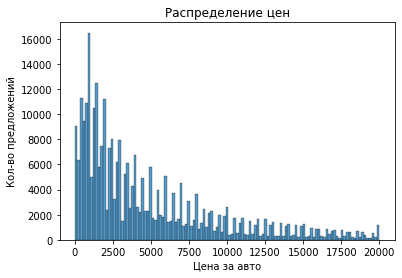

In [33]:
sns.histplot(df['price'], bins='auto')
plt.xlabel('Цена за авто')
plt.ylabel('Кол-во предложений')
plt.title('Распределение цен')

plt.show()

Видны выбросы в виде 0 и значений рядом с ним

Я изучил несколько сайтов с продажой авто и обнаружил, что дешевых машин(300+- евро) довольно много, но они в ужасном состояний, а предложений до 150 евро нет - буду использовать это значения для отсечения

In [34]:
df = df[df['price']>150]

In [35]:
df[df['price']==0]

,price,vehicle_type,registration_year,gearbox,power,model,Kilometer,fuel_type,brand,repaired


In [36]:
df[df['price']==100]

,price,vehicle_type,registration_year,gearbox,power,model,Kilometer,fuel_type,brand,repaired


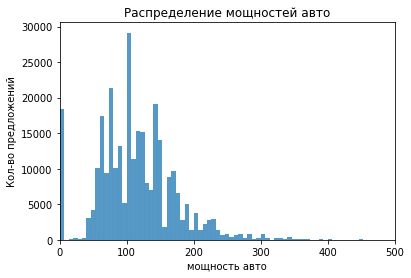

In [37]:
sns.histplot(df['power'], bins=3000)
plt.xlabel('мощность авто')
plt.ylabel('Кол-во предложений')
plt.title('Распределение мощностей авто')
plt.xlim(0, 500)
plt.show()

видны выбросы у 0 и выше 300

In [38]:
len(df[df['power']>300])

2852

In [39]:
df = df[(df['power']<350) & (df['power'] > 50)]

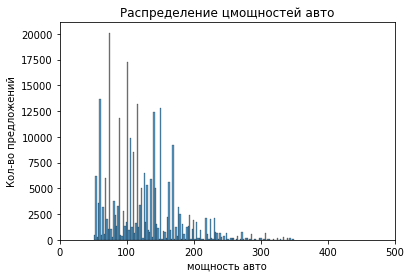

In [40]:
sns.histplot(df['power'], bins='auto')
plt.xlabel('мощность авто')
plt.ylabel('Кол-во предложений')
plt.title('Распределение цмощностей авто')
plt.xlim(0, 500)
plt.show()

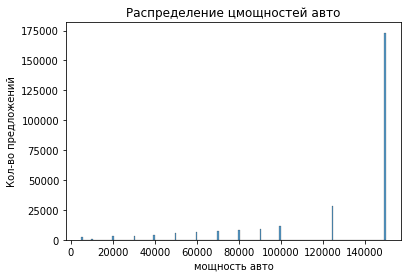

In [41]:
sns.histplot(df['Kilometer'], bins='auto')
plt.xlabel('мощность авто')
plt.ylabel('Кол-во предложений')
plt.title('Распределение цмощностей авто')

plt.show()

после describe и визуализации видно, что этот признак имеет очень большой разброс и основная чать сконцетрирована в значении 150000

In [42]:
len(df[df['Kilometer']>100000]) / len(df)

0.7665553795725512

я оставлю данные с ≥ 100000

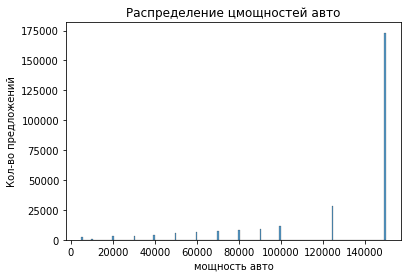

In [43]:
sns.histplot(df['Kilometer'], bins='auto')
plt.xlabel('мощность авто')
plt.ylabel('Кол-во предложений')
plt.title('Распределение цмощностей авто')

plt.show()

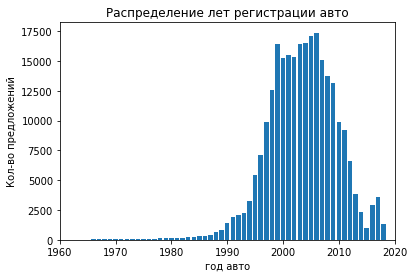

In [44]:
info = df['registration_year'].value_counts()
plt.bar(info.index, info.values)
plt.xlabel('год авто')
plt.ylabel('Кол-во предложений')
plt.title('Распределение лет регистрации авто')
plt.xlim(1960, 2020)

plt.show()

Тут я ничего удалять не буду, да, в основном все машины в датасете после 1995г, однако и в дизни можно встретить много старых автомобилей, думаю тут надо оставить все как есть


In [45]:
df = df[df['registration_year']<=2016]

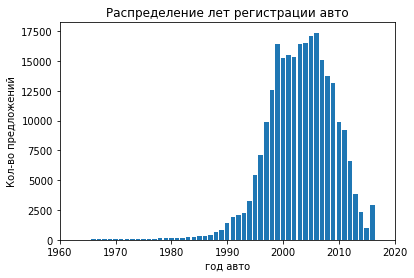

In [46]:
info = df['registration_year'].value_counts()
plt.bar(info.index, info.values)
plt.xlabel('год авто')
plt.ylabel('Кол-во предложений')
plt.title('Распределение лет регистрации авто')
plt.xlim(1960, 2020)

plt.show()

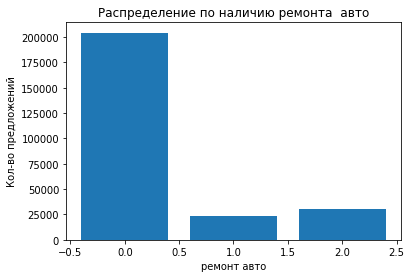

In [47]:
info = df['repaired'].value_counts()
plt.bar(info.index, info.values)
plt.xlabel('ремонт авто')
plt.ylabel('Кол-во предложений')
plt.title('Распределение по наличию ремонта  авто')

plt.show()

большинство машин не имели ремонта или так указали их владельцы, так же тут надо помнить, что 2 означает об отсутвии информации был ли ремонт у автомобиля или нет и таких данных больше, чем данных в которых указано о наличии ремонта

**Вывод**

В датасете действительно были проблемы: дубикаты, выбросы, пропуски, но все они были устранены и обработаны выше, теперь на этих данных можно обучать модели

In [48]:
loss =  354366 -  len(df)

In [49]:
loss / 354366 * 100

27.113775023563207

# Подготовка признаков для обучения

In [50]:
df

,price,vehicle_type,registration_year,gearbox,power,model,Kilometer,fuel_type,brand,repaired
2,9800,suv,2004,auto,163,grand,125000,gasoline,jeep,2
3,1500,small,2001,manual,75,golf,150000,petrol,volkswagen,0
4,3600,small,2008,manual,69,fabia,90000,gasoline,skoda,0
5,650,sedan,1995,manual,102,3er,150000,petrol,bmw,1
6,2200,convertible,2004,manual,109,2_reihe,150000,petrol,peugeot,0
...,...,...,...,...,...,...,...,...,...,...
354359,7900,sedan,2010,manual,140,golf,150000,gasoline,volkswagen,0
354362,3200,sedan,2004,manual,225,leon,150000,petrol,seat,1
354366,1199,convertible,2000,auto,101,fortwo,125000,petrol,smart,0
354367,9200,bus,1996,manual,102,transporter,150000,gasoline,volkswagen,0


Здесь представлена задача с учителем, на регрессию. Исходя из условия цеевой признак (target) является price, все осталальное пойдут как признаки (features), причем сперва над ними нужно поработать, большинство моделей работают только с чиловыми значениями, в текущем датасете много признаков типо object, нужно сделать кодирование 


In [51]:
df2 = df.copy()

selected_features = ['gearbox', 'fuel_type']


df = pd.get_dummies(df, columns=selected_features, drop_first=True)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('price', axis=1),
                                                    df['price'],
                                                    test_size=0.25,
                                                    random_state=12345)


In [53]:
 X_train.shape

(193713, 14)

In [54]:
 y_train.shape

(193713,)

In [55]:
 X_test.shape

(64571, 14)

In [56]:
 y_test.shape

(64571,)

In [57]:
encoder = ce.MEstimateEncoder(cols=['model', 'brand', 'vehicle_type'])

X_train = encoder.fit_transform(X_train, y_train)

X_test = encoder.transform(X_test)


In [58]:
X_train

,vehicle_type,registration_year,power,model,Kilometer,brand,repaired,gearbox_manual,fuel_type_electric,fuel_type_gasoline,fuel_type_hybrid,fuel_type_lpg,fuel_type_other,fuel_type_petrol
141639,3228.495054,2016,80,2449.110687,150000,3313.338893,2,1,0,0,0,0,0,1
256066,5029.528969,2001,196,5211.373115,150000,6946.173570,0,1,0,0,0,0,0,1
173474,9454.776730,1998,125,6377.519320,150000,3421.560572,0,1,0,1,0,0,0,0
188677,5029.528969,2013,101,3491.523329,20000,2743.853622,0,1,0,0,0,0,0,1
44142,5317.907133,2004,136,4894.518020,150000,3898.878544,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117249,3228.495054,2002,65,3423.609975,125000,5247.490583,2,1,0,0,0,0,0,1
182934,5317.907133,2007,163,5468.529610,150000,6781.789912,0,1,0,1,0,0,0,0
178993,5317.907133,2003,141,3732.183877,125000,4216.923422,0,1,0,0,0,0,0,1
106072,3228.495054,2000,57,1710.090643,70000,2743.853622,1,1,0,0,0,0,0,1


Что я сделал

я перенес vehicle_type к model и brand, раз нельзя по принципу "больше меньше раставлять" для OrdinalEncoder, подумал, что в таком случае можно занести сюда

что-бы модели не придавали каким-либо признакам особое значение только из-за разности в распредеении, признаки нужно масштабировать

In [59]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)


X_test_scaled = scaler.transform(X_test)


**Линейная регрессия**

In [60]:
%%time
model = LinearRegression()

mse_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')

rmse_scores = np.sqrt(-mse_scores)

print(rmse_scores.mean())

2703.8270785096784
CPU times: user 873 ms, sys: 711 ms, total: 1.58 s
Wall time: 1.57 s


Модель обучитилась и предсказала очень быстро, с неплохой точностью, однако не устраиваемой для заказчика(нужна  результатом менее 2500). Так что в дальнейшнем не возвращаемся к ней

**Дерево решений**

In [61]:
tree_regressor = DecisionTreeRegressor(random_state=42)
param_grid_tree = {
    'max_depth': [None, 5, 10, 20]
}
grid_search_tree = GridSearchCV(tree_regressor, param_grid_tree, cv=5, scoring='neg_mean_squared_error')
grid_search_tree.fit(X_train_scaled, y_train)




GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': [None, 5, 10, 20]},
             scoring='neg_mean_squared_error')

In [62]:
%%time
best_tree_model = DecisionTreeRegressor(max_depth=grid_search_tree.best_params_['max_depth'], random_state=12345)

best_tree_model.fit(X_train_scaled, y_train)

CPU times: user 886 ms, sys: 4.67 ms, total: 890 ms
Wall time: 892 ms


DecisionTreeRegressor(max_depth=20, random_state=12345)

In [63]:
%%time
predictions_tree = best_tree_model.predict(X_test_scaled)

CPU times: user 27.4 ms, sys: 0 ns, total: 27.4 ms
Wall time: 26.3 ms


In [64]:
rmse_tree = np.sqrt(mean_squared_error(y_test, predictions_tree))

print("RMSE для дерева решений:", rmse_tree)

RMSE для дерева решений: 1793.0442662674568


Дерево справилось намного лучше, чем предыдущие модели, причем за сравнительно похожее время

 **Случайный лес**

In [65]:
forest_regressor = RandomForestRegressor(random_state=42)
param_grid_forest = {
    'n_estimators': [10, 20, 30, 40],
    'max_depth': [None, 5, 10, 20, 30]   
}
grid_search_forest = GridSearchCV(forest_regressor, param_grid_forest, cv=5, scoring='neg_mean_squared_error')
grid_search_forest.fit(X_train_scaled, y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [None, 5, 10, 20, 30],
                         'n_estimators': [10, 20, 30, 40]},
             scoring='neg_mean_squared_error')

In [66]:
%%time
best_forest_model = RandomForestRegressor(max_depth=grid_search_forest.best_params_['max_depth'],
                                          n_estimators=grid_search_forest.best_params_['n_estimators'], 
                                          random_state=12345)

best_forest_model.fit(X_train_scaled, y_train)

CPU times: user 21.1 s, sys: 199 ms, total: 21.3 s
Wall time: 21.3 s


RandomForestRegressor(max_depth=20, n_estimators=40, random_state=12345)

In [67]:
%%time
best_forest_model = grid_search_forest.best_estimator_
predictions_forest = best_forest_model.predict(X_test_scaled)

CPU times: user 753 ms, sys: 3.94 ms, total: 757 ms
Wall time: 766 ms


In [68]:
rmse_forest = np.sqrt(mean_squared_error(y_test, predictions_forest))
print("RMSE для случайного леса:", rmse_forest)

RMSE для случайного леса: 1514.1283874841808


In [69]:
best_forest_model = grid_search_forest.best_estimator_
best_params = grid_search_forest.best_params_
best_params

{'max_depth': 20, 'n_estimators': 40}

Теперь лес имеет лучшюю метрика RMSE, очень хороший результат

**Градиентный бустинг - LGBMRegressor**

Тк модель может обучаться очень долго, для начала посмтотрю на результат не подбирая гиперпараметры

In [70]:
%%time
model = lgb.LGBMRegressor(random_state=12345)
model.fit(X_train_scaled, y_train)



CPU times: user 6min 2s, sys: 4.71 s, total: 6min 7s
Wall time: 6min 9s


LGBMRegressor(random_state=12345)

In [71]:
%%time
predictions_train = model.predict(X_test_scaled)

CPU times: user 501 ms, sys: 2.66 ms, total: 504 ms
Wall time: 517 ms


In [72]:
rmse = mean_squared_error(y_test, predictions_train)**0.5
print(rmse)

1611.5366069353165


Впечатляет, значит есть основания улучшить

In [73]:
param_grid = {'n_estimators': [20, 100], 'num_leaves': [n for n in range(10, 100, 30)]}

In [74]:
model = lgb.LGBMRegressor(random_state=12345)

tuning_model=GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=3,
                          verbose=3)

tuning_model.fit(X_train_scaled, y_train)
display(tuning_model.best_params_)
display(tuning_model.best_score_*-1)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV 1/3] END .................n_estimators=20, num_leaves=10; total time=  25.5s
[CV 2/3] END .................n_estimators=20, num_leaves=10; total time=  31.4s
[CV 3/3] END .................n_estimators=20, num_leaves=10; total time=  22.8s
[CV 1/3] END .................n_estimators=20, num_leaves=40; total time= 1.3min
[CV 2/3] END .................n_estimators=20, num_leaves=40; total time= 1.6min
[CV 3/3] END .................n_estimators=20, num_leaves=40; total time= 1.5min
[CV 1/3] END .................n_estimators=20, num_leaves=70; total time= 2.9min
[CV 2/3] END .................n_estimators=20, num_leaves=70; total time= 3.0min
[CV 3/3] END .................n_estimators=20, num_leaves=70; total time= 2.8min
[CV 1/3] END ................n_estimators=100, num_leaves=10; total time= 2.7min
[CV 2/3] END ................n_estimators=100, num_leaves=10; total time= 2.1min
[CV 3/3] END ................n_estimators=100, nu

{'n_estimators': 100, 'num_leaves': 70}

1584.3266678733996

In [75]:
%time
predictions = tuning_model.predict(X_test_scaled)
rmse = mean_squared_error(y_test, predictions, squared=False)
print("Root Mean Squared Error (RMSE) на тестовых данных с лучшими параметрами:", rmse)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.39 µs
Root Mean Squared Error (RMSE) на тестовых данных с лучшими параметрами: 1557.6725337177684


Этот результат как со случайным лесом самые лучшие по метрике

**Итог**

- По метрике лучшие результаты с отрывом у LGBMRegressor('n_estimators': 100, 'num_leaves': 70) и случайный лес('max_depth': 20, 'n_estimators': 40)
- Первая модель из них имеет быстрое время обучения 5с и более быстрое время предсказания
- Вторая модель быстрее обучается

Я бы остановился на второй модели(Градиентный бустинг), разница между итоговыми метриками не так сильна, как и время предсказания, а вот время обчучения у градиетного бустинга быстрее 5сек против 14сек